In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('ex2data1.txt', header = None)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [3]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [5]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [6]:
df[df.iloc[:,2] == 1]

,0,1,2
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1
12,82.307053,76.481963,1
13,69.364589,97.718692,1
15,53.971052,89.207350,1
16,69.070144,52.740470,1


In [20]:
m = len(y)
(y == 1).shape

(100,)

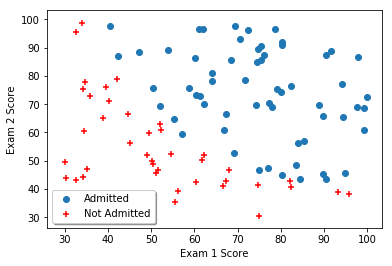

In [33]:
pos = (y == 1).reshape(m,1)
neg = (y == 0).reshape(m,1)
plt.scatter(X[pos[:,0], 0], X[pos[:,0],1] )
plt.scatter(X[neg[:,0], 0], X[neg[:,0],1], marker = '+', color = 'r')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(['Admitted', 'Not Admitted'], shadow = 1)

In [34]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [35]:
sigmoid(0)

0.5

In [36]:
def costFunction(theta, X, y):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    error = (-y*np.log(predictions)) - ((1-y)*np.log(1 - predictions))
    cost = (1/m)*sum(error)
    gradient = (1/m)*np.dot(X.transpose(), (predictions - y))
    return cost[0], gradient

In [37]:
def featureNormalization(X):
    mean = np.mean(X)
    std = np.std(X)
    X_norm = (X - mean)/std
    
    return X_norm, mean, std

In [38]:
m, n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)

In [39]:
X = np.append(np.ones((m,1)), X, axis = 1)
y = y.reshape(m,1)
initial_theta = np.zeros((n+1,1))

In [40]:
cost, gradient = costFunction(initial_theta, X, y)

In [41]:
gradient

array([[-0.1       ],
       [-0.28606568],
       [-0.24664251]])

In [42]:
cost

0.693147180559946

In [43]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = []
    for i in range(num_iters):
        cost, grad = costFunction(theta, X, y)
        J_history.append(cost)
        theta = theta - (alpha*grad)
        
    return theta, J_history
    

In [44]:
theta, j = gradientDescent(X, y, initial_theta, 0.01, 400)

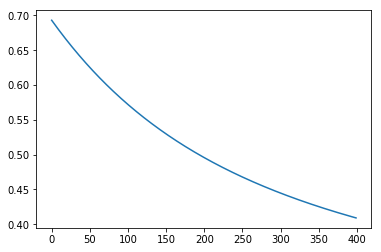

In [45]:
plt.plot(j)

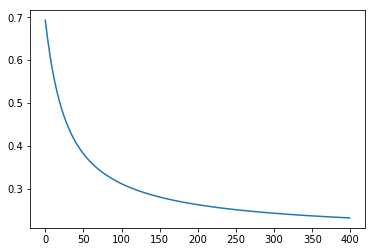

In [46]:
theta, j = gradientDescent(X, y, initial_theta, 0.1, 400)
plt.plot(j)

Text(0.5, 1.0, 'Cost Funstion using Gradient Descent')

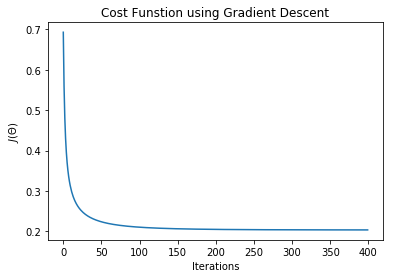

In [47]:
theta, j = gradientDescent(X, y, initial_theta, 1, 400)
plt.plot(j)
plt.ylabel('$J(\Theta)$')
plt.xlabel('Iterations')
plt.title('Cost Funstion using Gradient Descent')

In [48]:
print('The optimised cost is ', j[-1])

The optimised cost is  0.20360075017627066


In [49]:
print('Theta optimized for gradient descent are', theta)

Theta optimized for gradient descent are [[1.66076085]
 [3.78163527]
 [3.6892621 ]]


In [51]:
X

array([[ 1.        , -1.65375318,  0.63867086],
       [ 1.        , -1.88282896, -1.16404507],
       [ 1.        , -1.58911527,  0.36810288],
       [ 1.        , -0.30374089,  1.07622077],
       [ 1.        ,  0.69191528,  0.4970977 ],
       [ 1.        , -1.10128063, -0.50795338],
       [ 1.        , -0.25493217,  1.61513221],
       [ 1.        ,  0.48021493, -1.02359698],
       [ 1.        ,  0.53694533,  1.13495707],
       [ 1.        ,  0.9771454 , -1.18314485],
       [ 1.        ,  1.58080631, -1.46351723],
       [ 1.        ,  0.47962931, -1.8661088 ],
       [ 1.        ,  0.86486332,  0.55718455],
       [ 1.        ,  0.18124787,  1.67889949],
       [ 1.        , -1.3941619 ,  0.53367179],
       [ 1.        , -0.63183216,  1.22933405],
       [ 1.        ,  0.16569542, -0.696831  ],
       [ 1.        ,  0.1063638 , -1.01701774],
       [ 1.        ,  0.24975067,  1.42581165],
       [ 1.        ,  0.58342639, -0.96961801],
       [ 1.        ,  0.07600163, -1.219

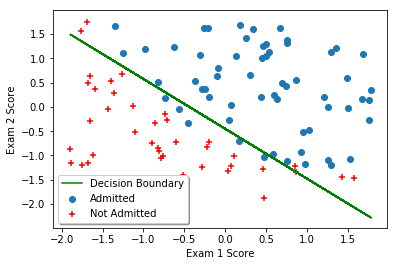

In [93]:
plt.scatter(X[pos[:,0],1], X[pos[:,0],2], label = 'Admitted')
plt.scatter(X[neg[:,0],1], X[neg[:,0],2], color = 'r', marker  = '+', label = 'Not Admitted')
plt.plot(X[:,1], -(theta[0] + theta[1]*X[:,1])/theta[2], color = 'g', label = 'Decision Boundary')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(shadow = 1)
plt.show()

In [82]:
def predict(X, theta):
    predictions = X.dot(theta)
    return predictions>0

In [76]:
x_test_marks = np.array([55, 68])
x_test = (x_test_marks - X_mean)/X_std
x_test = np.append(np.ones(1), x_test)
prob = sigmoid(x_test.dot(theta))
print('For a student with marks {0} and {1}, we predict admission probability of {2}'.format(x_test_marks[0],x_test_marks[1], prob[0]))

For a student with marks 55 and 68, we predict admission probability of 0.46995836081001374


## Accuracy on Training set

In [88]:
p=predict(X, theta)
print('Train Accuracy: {0}%'.format((sum(p==y)*100/m)[0]))

Train Accuracy: 89.0%
